## Observations and Insights 

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Read into files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
# Display the data table for preview
combined_df.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [3]:
# Checking the number of mice.
#combined_df['Mouse ID'].value_counts()
#ids = combined_df["Mouse ID"]
#combined_df[ids.isin(ids[ids.duplicated()])].sort()
len(combined_df['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_df = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dupe_df

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_df.loc[combined_df['Mouse ID'] == 'g989']
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dupe_df)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#summary = combined_df[['Drug Regimen', 'Tumor Volume (mm3)']]
regimens = clean_df.groupby('Drug Regimen')

tumor_mean = regimens['Tumor Volume (mm3)'].mean()
tumor_median = regimens['Tumor Volume (mm3)'].median()
tumor_std = regimens['Tumor Volume (mm3)'].std()
tumor_sem = regimens['Tumor Volume (mm3)'].sem()

regimen_df = pd.DataFrame({'Mean': tumor_mean, 
                           'Median': tumor_median,
                           'Standard Deviation': tumor_std, 
                           'SEM': tumor_sem})
regimen_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

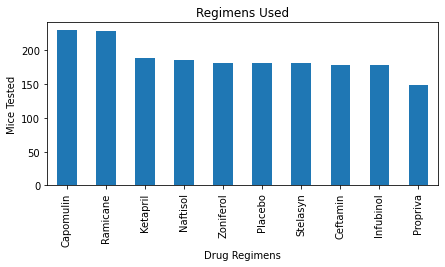

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = clean_df['Drug Regimen'].value_counts()
regimen_count.plot(kind='bar', figsize=(7,3))
plt.title("Regimens Used")
plt.xlabel("Drug Regimens")
plt.ylabel("Mice Tested")
plt.show()

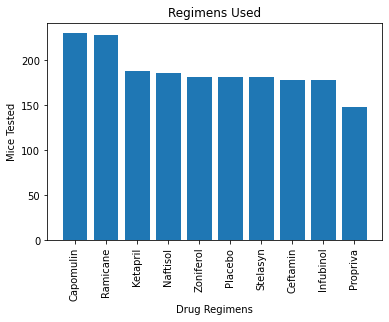

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen_count.index.values, regimen_count.values)
plt.title("Regimens Used")
plt.xlabel("Drug Regimens")
plt.xticks(rotation=90)
plt.ylabel("Mice Tested")
plt.show()

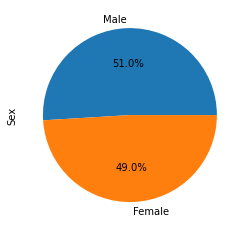

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_df["Sex"].value_counts()
sex_count.plot(kind='pie', autopct='%1.1f%%')
plt.show()

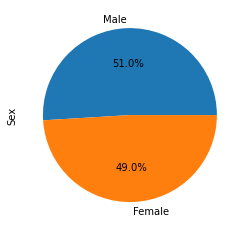

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count.values, labels=sex_count.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_df = max_timepoint.merge(clean_df, how='left', on=['Mouse ID', 'Timepoint'])
max_df.tail(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
241,z234,5,46.129357,1,Naftisol,Female,19,27
242,z314,5,45.934712,0,Stelasyn,Female,21,28
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29
247,z969,45,73.867845,4,Naftisol,Male,9,30


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = max_df.loc[max_df["Drug Regimen"] == drug]
    
    # add subset 
    tumor_df = tumor_volume.loc[tumor_volume['Timepoint'] == tumor_volume['Timepoint']]
    
    values = tumor_df['Tumor Volume (mm3)']
    tumor_data.append(values)
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f'IQR for {treatments} is: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug} is: {lower_bound}')
    print(f'Upper Bound for {drug} is: {upper_bound}')

    outliers_count = (values.loc[(tumor_df['Tumor Volume (mm3)'] >= upper_bound) |
                                 (tumor_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
                                 
    print(f'Number of {drug} outliers in {outliers_count}:')

IQR for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is: 7.781863460000004
Lower Bound for Capomulin is: 20.70456164999999
Upper Bound for Capomulin is: 51.83201549
Number of Capomulin outliers in 0:
IQR for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is: 9.098536719999998
Lower Bound for Ramicane is: 17.912664470000003
Upper Bound for Ramicane is: 54.30681135
Number of Ramicane outliers in 0:
IQR for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is: 11.477135160000003
Lower Bound for Infubinol is: 36.83290494999999
Upper Bound for Infubinol is: 82.74144559000001
Number of Infubinol outliers in 1:
IQR for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is: 15.577752179999997
Lower Bound for Ceftamin is: 25.355449580000002
Upper Bound for Ceftamin is: 87.66645829999999
Number of Ceftamin outliers in 0:


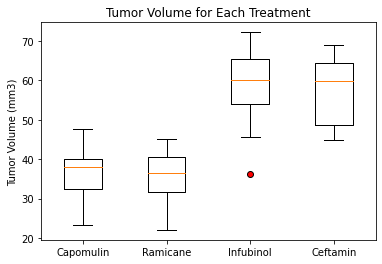

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker="o", markerfacecolor='r')
fig, ax1 = plt.subplots()
ax1.boxplot(tumor_data, flierprops=flierprops)
plt.title('Tumor Volume for Each Treatment')
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

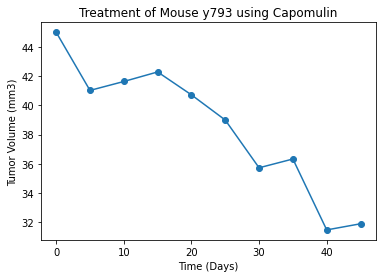

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#pick a mouse treated with Capomulin and use its ID as a variable
y793 = clean_df.loc[clean_df['Mouse ID'] == 'y793']
                    
#plot line chart and create labels
plt.plot(y793['Timepoint'], y793['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Treatment of Mouse y793 using Capomulin")
plt.show()

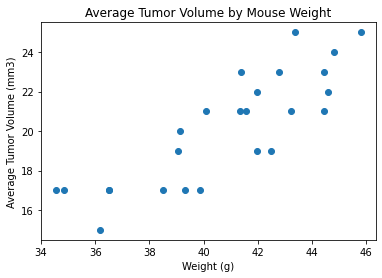

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Create dataframe for mice only treated by Capomulin
cap_df = clean_df.loc[clean_df['Drug Regimen'] =='Capomulin']

#find avg volume within cap_df
avg_vol = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
avg_vol = avg_vol.reset_index()

#rename Volume column and merge w/ cap_df, then drop duplicates
avg_vol = avg_vol.rename(columns={'Tumor Volume (mm3)': 'Avg Volume'})
avg_vol = pd.merge(cap_df, avg_vol, on='Mouse ID')
final_avg = avg_vol[['Weight (g)', 'Avg Volume']].drop_duplicates()

#Assign values to x and y axes
y = final_avg['Weight (g)']
x = final_avg['Avg Volume']

#Create labels/title and print scatter plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight')
plt.scatter(x,y)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
